In [1]:
import numpy as np
import xarray as xr
from modules.crank_nicholson import crank_nicholson_1D
from modules.classes import Quantity1D, Analytic
import matplotlib.pyplot as plt
from scipy.linalg import solve, solve_banded

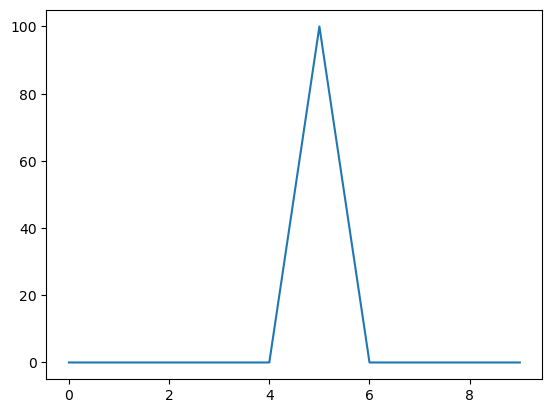

In [2]:
# Initialize a constant diffusion coefficient function
diffusion = Analytic(lambda x, y: x)
diffusion.set_partial_x(lambda x, y: 1)
# Initialize the concentration object
# Note: Von Neumann Stability condition is (D * dt)/dx**2 < 0.5, else spurious decaying oscillations occur
n_grid = 10
n_time = 20
dt = 0.0001
dx = 0.001
conc = Quantity1D(
    n_grid,
    n_time,
    (0, n_grid*dx),
    (0, dt*n_time),
)
xcoords = conc.xcoords
#initial_condition =  10*np.exp(- (10*n_grid*dx)*(xcoords - 0.5*dx*n_grid)**2)
initial_condition = np.zeros_like(xcoords)
initial_condition[n_grid//2] = 100
sources = np.zeros_like(xcoords)
sinks = np.zeros_like(xcoords)
#sources[8] = 1
#sinks[11] = 5
plt.plot(initial_condition)

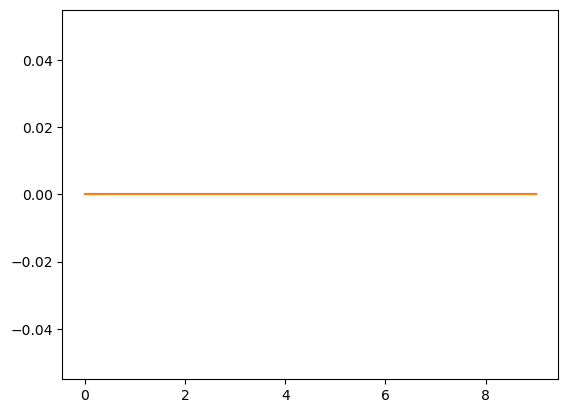

In [3]:
plt.plot(sources)
plt.plot(-sinks)

In [4]:
result_ds = crank_nicholson_1D(conc, diffusion, initial_condition, sources)

In [5]:
result_ds

<xarray.DataArray 'concentration' (x: 10, t: 20)> Size: 2kB
array([[ 0.00000000e+00,  5.93295174e-02, -1.80579948e-01,
        -9.30558662e-01, -1.64888962e+00, -1.85729674e+00,
        -1.50569787e+00, -7.17541965e-01,  3.50243398e-01,
         1.56117277e+00,  2.81229388e+00,  4.03189335e+00,
         5.17299416e+00,  6.20682555e+00,  7.11749209e+00,
         7.89796701e+00,  8.54719703e+00,  9.06805171e+00,
         9.46588680e+00,  9.74754503e+00],
       [ 0.00000000e+00,  5.93295174e-02,  3.20424865e-01,
         8.73442645e-01,  1.67803821e+00,  2.63632382e+00,
         3.65698081e+00,  4.66992044e+00,  5.62652167e+00,
         6.49560862e+00,  7.25895725e+00,  7.90750499e+00,
         8.43846281e+00,  8.85321682e+00,  9.15583999e+00,
         9.35205146e+00,  9.44849593e+00,  9.45224946e+00,
         9.37048478e+00,  9.21024895e+00],
       [ 0.00000000e+00,  5.60334331e-01,  2.12442617e+00,
         4.20037048e+00,  6.17165877e+00,  7.79900249e+00,
         9.04444321e+00,  9.94619872e+00,  1.05609575e+01,
         1.09422720e+01,  1.11345689e+01,  1.11729736e+01,
         1.10848541e+01,  1.08915647e+01,  1.06099244e+01,
         1.02533504e+01,  9.83269368e+00,  9.35684744e+00,
...
         9.74838369e+00,  8.81942629e+00,  7.32787168e+00,
         5.70871002e+00,  4.08960632e+00,  2.52601702e+00,
         1.03100964e+00, -3.94558682e-01, -1.75592601e+00,
        -3.05979694e+00, -4.31307228e+00, -5.52213542e+00,
        -6.69267961e+00, -7.82967448e+00, -8.93741979e+00,
        -1.00196203e+01, -1.10794658e+01],
       [ 0.00000000e+00,  9.14054478e-01,  2.64218732e+00,
         2.92843938e+00,  1.81218183e+00,  5.03577067e-01,
        -9.22544568e-01, -2.32379324e+00, -3.68805186e+00,
        -5.00158590e+00, -6.26698588e+00, -7.48751001e+00,
        -8.66814574e+00, -9.81359707e+00, -1.09282756e+01,
        -1.20160756e+01, -1.30804072e+01, -1.41242230e+01,
        -1.51500751e+01, -1.61601676e+01],
       [ 0.00000000e+00,  9.14054478e-01, -3.26536631e-01,
        -3.59775327e+00, -5.00776248e+00, -6.50366739e+00,
        -7.74683918e+00, -8.95504782e+00, -1.01014514e+01,
        -1.12156548e+01, -1.22995814e+01, -1.33599372e+01,
        -1.43997297e+01, -1.54219459e+01, -1.64288004e+01,
        -1.74222159e+01, -1.84038032e+01, -1.93749557e+01,
        -2.03368783e+01, -2.12906224e+01]])
Coordinates:
  * x        (x) float64 80B 0.0 0.001111 0.002222 ... 0.007778 0.008889 0.01
  * t        (t) float64 160B 0.0 0.0001053 0.0002105 ... 0.001895 0.002
Attributes:
    dx:                      0.0011111111111111111
    dt:                      0.00010526315789473685
    n_grid:                  10
    n_time:                  20
    initial_condition:       [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.]
    sources:                 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    diffusion_coefficients:  [0.         0.00111111 0.00222222 0.00333333 0.0...
    metadata:                Generated by crank_nicholson_1D

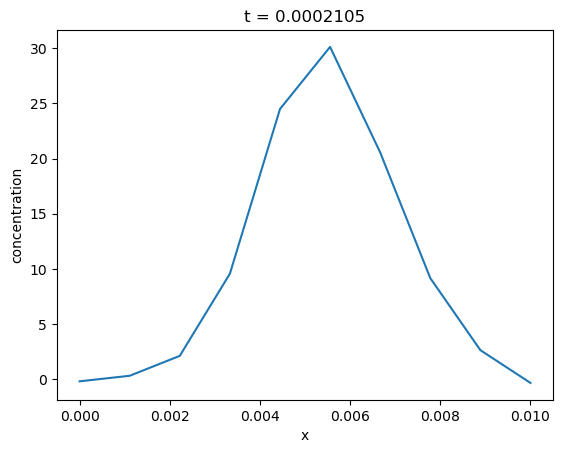

In [6]:
result_ds.isel(t=2).plot()

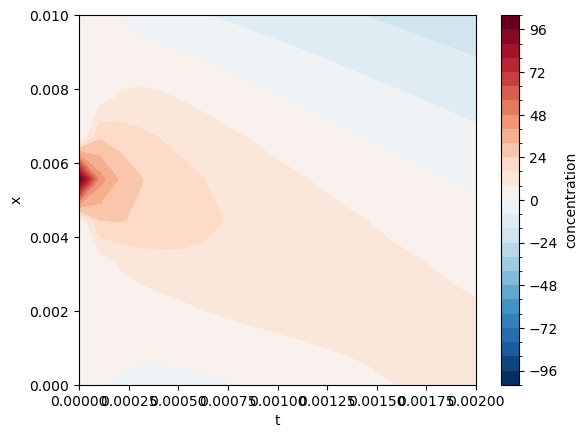

In [7]:
result_ds.plot.contourf(levels=30)